In [23]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

import sys
sys.path.insert(0, '../Modules/')

from general import gaussian
from clustering import mean_shift, shift_to_convergence


In [24]:
from sklearn.datasets import make_blobs

In [62]:
X, y = make_blobs()

In [80]:
from general import gaussian, centre_of_mass


def guassian_shift(points, mean_pos, radius):
    
    distances = np.linalg.norm(points - mean_pos, axis=1)
    
    # Gaussian kernel with standard deviation set to the bandwidth parameter
    K = partial(gaussian, mu=0, sigma=radius)
    masses = K(distances)

    return centre_of_mass(points, masses)


def flat_kernel_shift(points, mean_pos, radius):
    
    distances = np.linalg.norm(points - mean_pos, axis=1)
    
    within_radius = distances <= radius
    
    points_in_radius = points[within_radius, :]
    n_in_radius, _ = points_in_radius.shape
    
    masses = np.ones(n_in_radius)

    return centre_of_mass(points_in_radius, masses)

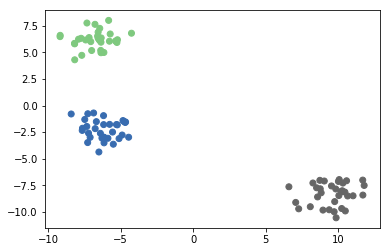

In [92]:
# labels, centroids, k = mean_shift(X, gaussian_shift, bandwidth=5)

labels, centroids, k = mean_shift(X, flat_kernel_shift, bandwidth=5)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')